# Introduction to Derivatives - Lab

## Introduction
In this lab, we will practice our knowledge of derivatives. Remember that our key formula for derivatives, is 
$f'(x) = \dfrac{\Delta y}{\Delta x} =  \dfrac{f(x + \Delta x) - f(x)}{\Delta x}$.  So in driving towards this formula, we will do the following: 

1. Learn how to represent linear and nonlinear functions in code 
2. Then, because our calculation of a derivative relies on seeing the output at an initial value and the output at that value plus $\Delta x$, we need an `output_at` function
3. Then we will be able to code the $\Delta f$ function that sees the change in output between the initial $x$ and that initial $x$ plus the $\Delta x$ 
4. Finally, we will calculate the derivative at a given $x$ value, `derivative_at`

## Objectives 

You will be able to: 

- Understand the definition of a derivative
- Understand that a derivative is the instantaneous rate of change of a function

## Let's begin: Starting with functions

### 1. Representing Functions

We are about to learn to take the derivative of a function in code.  But before doing so, we need to learn how to express any kind of function in code.  This way when we finally write our functions for calculating the derivative, we can use them with both linear and nonlinear functions.

For example, we want to write the function $f(x) = 2x^2 + 4x - 10 $ in a way that allows us to easily determine the exponent of each term.

This is our technique: write the formula as a numpy array. For example, for a function $f(x)= 7x^3$:

```python
arr = np.array([7, 3])
arr[0] # 7
arr[1] # 3
```

Take the following function as an example: 

$$f(x) = 4x^2 + 4x - 10 $$

We can use a [N-dimensional array](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html) to represent this: 

In [1]:
import numpy as np
array_1 = np.array([[4, 2], [4, 1], [-10, 0]])

In [2]:
np.shape(array_1)

(3, 2)

So each row in the `np.array` represents a different term in the function.  The first column is the term's constant and the second column is the term's exponent.  Thus $4x^2$ translates to `[4, 2]` and  $-10$ translates to `[-10, 0]` because $-10$ equals $-10*x^0$.  
> We'll refer to this `np.array` as "array of terms", or `array_of_terms`.

Ok, so give this a shot. Write $ f(x) = 4x^3 + 11x^2 $ as an array of terms.  Assign it to the variable `array_2`.

In [3]:
array_2 = np.array([[4,3],[11,2]])
array_2

array([[ 4,  3],
       [11,  2]])

### 2. Evaluating a function at a specific point 

Now that we can represent a function in code, let's write a Python function called `term_output` that can evaluate what a single term equals at a value of $x$.  

* For example, when $x = 2$, the term $3x^2 = 3*2^2 = 12 $.  
* So we represent $3x^2$ in code as `(3, 2)`, and: 
* `term_output((3, 2), 2)` should return 12


In [4]:
def term_output(array, input_value):
    return array[0]*input_value **array[1]

In [5]:
term_output(np.array([3, 2]), 2) # 12

12

> **Hint:** To raise a number to an exponent in python, like 3^2 use the double star, as in:
```python
3**2 # 9 
```

Now write a function called `output_at`, when passed a `array_of_terms` and a value of $x$, calculates the value of the function at that value.  
* For example, we'll use `output_at` to calculate $f(x) = 3x^2 - 11$.  
* Then `output_at([np.array([[3, 2], [-11, 0]]), 2)` should return $f(2) = 3*2^2 - 11 = 1$. Store `np.array([[3, 2], [-11, 0]])` as `array_3`.

In [6]:
def output_at(array_of_terms, x_value):
    return sum([term_output(tup, x_value) for tup in array_of_terms])

In [7]:
array_3 = np.array([[3, 2], [-11, 0]])

Verify that $f(2) = 3*2^2 - 11 = 1$.

In [8]:

# 1 

In [9]:
output_at(array_3, 2)

1

What value does $f(3)$ return?

In [10]:
output_at(array_3, 3)
# 16

16

Now we can use our `output_at` function to display our function graphically.  We simply declare a list of `x_values` and then calculate `output_at` for each of the `x_values`.

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
x_values = np.linspace(-30, 30, 100)
y_values = list(map(lambda x: output_at(array_3, x), x_values))

plt.plot(x_values, y_values, label = "3x^2 - 11")

ax.legend(loc="upper center",fontsize='large')
plt.show()

<Figure size 1200x600 with 1 Axes>

## Moving to derivatives of linear functions

Let's start with a function, $f(x) = 4x + 15$.  We represent the function as the following:

In [12]:
lin_function = np.array([[4, 1],[15,0]])

We can plot the function by calculating outputs at a range of $x$ values.  Note that we use our `output_at` function to calculate the output at each individual $x$ value.

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")

ax.legend(loc="upper center",fontsize='large')

plt.show()

Ok, time to do what we are here for: *derivatives*.  Remember that the derivative is the instantaneous rate of change of a function, and is expressed as:

$$ f'(x) = \frac{\Delta f}{\Delta x}  = \frac{f(x + \Delta x) - f(x)}{\Delta x}  $$ 

### Writing a function for $\Delta f$

We can see from the formula above that  $\Delta f = f(x + \Delta x ) - f(x) $.  Write a function called `delta_f` that, given a `list_of_terms`, an `x_value`, and a value $\Delta x $, returns the change in the output over that period.
> **Hint** Don't forget about the `output_at` function.  The `output_at` function takes a list of terms and an $x$ value and returns the corresponding output.  So really **`output_at` is equivalent to $f(x)$**, provided a function and a value of x.

In [47]:
def delta_f(array_of_terms, x_value, delta_x):
    return output_at(array_of_terms, x_value + delta_x) - output_at(array_of_terms, x_value)

In [48]:
delta_f(lin_function, 2, 1) # 4

4

So for $f(x) = 4x + 15$, when $x$ = 2, and $\Delta x = 1$, $\Delta f$ is 4.  

### Plotting our function, delta f, and delta x  

Let's show $\Delta f$ and $\Delta x$ graphically.

In [49]:
x_value = 2
delta_x = 1

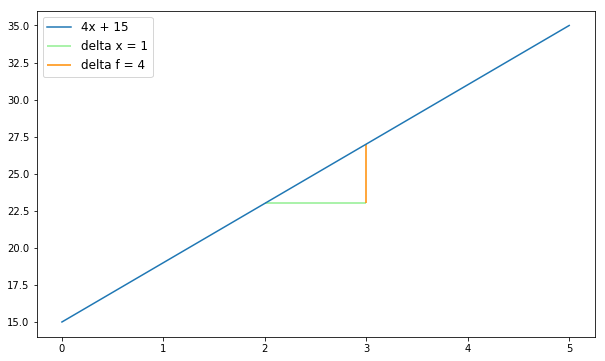

In [50]:
fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")

# delta x
y_val = output_at(lin_function, x_value)
hline_lab= 'delta x = ' + str(delta_x)
plt.hlines(y=y_val, xmin= x_value, xmax= x_value + delta_x, color="lightgreen", label = hline_lab)

# delta f
y_val_max = output_at(lin_function, x_value + delta_x)
vline_lab =  'delta f = ' + str(y_val_max-y_val)
plt.vlines(x = x_value + delta_x , ymin= y_val, ymax=y_val_max, color="darkorange", label = vline_lab)
ax.legend(loc='upper left', fontsize='large')

plt.show()

### Calculating the derivative

Write a function, `derivative_at` that calculates $\dfrac{\Delta f}{\Delta x}$ when given a `array_of_terms`, an `x_value` for the value of $(x)$ the derivative is evaluated at, and `delta_x`, which represents $\Delta x$.  

Let's try this for $f(x) = 4x + 15 $.  Round the result to three decimal places.

In [52]:
def derivative_of(array_of_terms, x_value, delta_x):
    delta = delta_f(array_of_terms, x_value, delta_x)
    return round(delta/delta_x, 3)

Now let's use this function along with our stored `x_value` and `delta_x`.

In [54]:
derivative_of(lin_function,x_value, delta_x)
# 4.0

4.0

### We do: Building more plots

Ok, now that we have written a Python function that allows us to plot our list of terms, we can write a function called `tangent_line` that outputs the necessary terms to plot the or slope for the function between initial $x$ and $x$ plus $\Delta x$. We'll walk you through this one.  

In [ ]:
def tangent_line(array_of_terms, x_value, line_length = 4, delta_x = .01):
    y = output_at(array_of_terms, x_value)
    derivative_at = derivative_of(array_of_terms, x_value, delta_x)
    
    x_dev = np.linspace(x_value - line_length/2, x_value + line_length/2, 50)
    tan = y + derivative_at *(x_dev - x_value)
    return {'x_dev':x_dev, 'tan':tan, 'lab': " f' (x) = " + str(derivative_at)}

> Our `tangent_line` function takes as arguments `list_of_terms`, `x_value`, which is where our line should be tangent to our function, `line_length` as the length of our tangent line, and `delta_x` which is our $\Delta x$.


> The return value of `tangent_line` is a dictionary that represents the tangent line at that values of $x$. It uses `output_at()` to calculate the function value at a particular $x$ and the `derivative_of()` function you wrote above to calculate the slope of the tangent line. 
Next, it uses `line_length` along with the `np.linspace` to generate an array of x-values to be used as an input to generate the tangent line `tan`.

Let's look at the output of the `tangent_line()`, using our `lin_function`,  $x$ equal to 2, $\Delta_x$ equal to 0.1 and `line_length` equal to 2.

In [ ]:
tan_line = tangent_line(lin_function, 2, line_length = 2, delta_x = .1)
tan_line

Now, let's plot our function, $\Delta f$ and $\Delta x$ again along with our `rate_of_change` line.

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")
# tangent_line
plt.plot(tan_line['x_dev'], tan_line['tan'], color = "yellow", label = tan_line['lab'])

# delta x
y_val = output_at(lin_function, x_value)
hline_lab= 'delta x = ' + str(delta_x)
plt.hlines(y=y_val, xmin= x_value, xmax= x_value + delta_x, color="lightgreen", label = hline_lab)

# delta f
y_val_max = output_at(lin_function, x_value + delta_x)
vline_lab =  'delta f = ' + str(y_val_max-y_val)
plt.vlines(x = x_value + delta_x , ymin= y_val, ymax=y_val_max, color="darkorange", label = vline_lab)
ax.legend(loc='upper left', fontsize='large')

plt.show()

So that function highlights the rate of change is moving at precisely the point $x = 2$. Sometimes it is useful to see how the derivative is changing across all $x$ values.  With linear functions we know that our function is always changing by the same rate, and therefore the rate of change is constant.  Let's write a function that allows us to see the function, and the derivative side by side.

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

x_values = np.linspace(0, 5, 100)
function_values = list(map(lambda x: output_at(lin_function, x),x_values))
derivative_values = list(map(lambda x: derivative_of(lin_function, x, delta_x), x_values))

# plot 1
plt.subplot(121)
plt.plot(x_values, function_values, label = "f (x)")
plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x)")
plt.legend(loc="upper left");

plt.show()

## Summary

In this section, we coded out our function for calculating and plotting the derivative.  We started with seeing how we can represent different types of functions.  Then we moved onto writing the `output_at` function which evaluates a provided function at a value of x.  We calculated `delta_f` by subtracting the output at initial x value from the output at that initial x plus delta x.  After calculating `delta_f`, we moved onto our `derivative_at` function, which simply divided `delta_f` from `delta_x`.  

In the final section, we plotted out some of our findings. We introduced the `tangent_line` function to get the slope for a function between an initial $x$, and $x + \Delta x $